# Amtrak Reviews Analysis

## Executive Summary

The goal of this analysis is to look at customer reviews of Amtrak's Northeastern Regional service from Washington D.C. to Boston to analyze how customers feel about the service as well as recommend where Amtrak invests its finances to better improve customer experiences! By scraping TripAdvisor, Yelp, and other discussion forums, I aim to look at how the customer experience is on Amtrak and what the company can do better to enhance the experience to bring back the train transport system in America!

## Data Scraping & Dataset Formation

In [23]:
from scrape import add_reviews_to_dict, print_review_count
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stops = ['2 S Station', 'Boston, MA 02111', 'Yelp users haven’t asked any questions yet about Amtrak.', 'Start your review of Amtrak.']
reviews = {}

In [3]:
# Scrape reviews off Yelp and add valid reviews to list
add_reviews_to_dict(0, 90, step=10, base_url='https://www.yelp.com/biz/amtrak-boston-3?start={}',
                    tag_type='span', class_names='raw__09f24__T4Ezm', stop_list=stops, review_dct=reviews)

In [4]:
# Loop through each page fo Trustpilot and add valid reviews to the list
add_reviews_to_dict(1, 30, base_url="https://www.trustpilot.com/review/www.amtrak.com?page={}",
                              tag_type='p', review_dct=reviews,
                              class_names='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn',
                              stop_list=stops,
                              attrs={'data-service-review-text-typography': 'true'})

In [5]:
# Loop through each page fo Viewpoints.com and add valid reviews to the list
add_reviews_to_dict(0, 1, base_url="https://www.viewpoints.com/Amtrak-Train-TRavel-reviews",
                              tag_type='p', review_dct=reviews,
                              class_names=['pr-review-faceoff-review', 'pr-comments', 'pr-review-faceoff-review-full'],
                              stop_list=stops)

In [6]:
# Loop through each page fo Reddit.com and add valid reviews to the list
add_reviews_to_dict(0, 1, base_url="https://www.sitejabber.com/reviews/amtrak.com",
                              tag_type='p', review_dct=reviews,
                              stop_list=stops)

In [7]:
# Export data to dataframe
rows = []
# Loop through the dictionary and extract website_name and review
for website_name, review_list in reviews.items():
    for r in review_list:
        rows.append({'Website': website_name, 'Review': r})

# Create the DataFrame
df = pd.DataFrame(rows)

In [10]:
# Store as CSV file
df.to_csv('/Users/srihariraman/PycharmProjects/Amtrak Twitter Analysis/Amtrak-Twitter-Analysis/reviews.csv')

## Pre-Processing EDA

In [3]:
# Load dataset via CSV when offline
df = pd.read_csv("reviews.csv")

In [4]:
df.head()

,Unnamed: 0,Website,Review
0,0,yelp.com,See all 45 photos
1,1,yelp.com,See all 45 photos
2,2,yelp.com,I called Amtrak and they were running on-time ...
3,3,yelp.com,in the late afternoon!
4,4,yelp.com,Amtrak service in the


In [5]:
df.shape

(896, 3)

In [6]:
df.nunique()

Unnamed: 0    896
Website         4
Review        732
dtype: int64

In [12]:
# Drop unnamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
df.columns

Index(['Website', 'Review'], dtype='object')

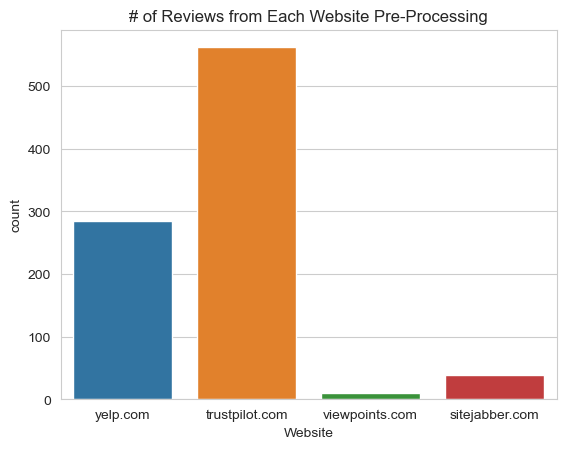

In [21]:
# Analyze count for number of reviews for each website
sns.set_style('whitegrid')
sns.countplot(data=df, x='Website')
plt.title('# of Reviews from Each Website Pre-Processing');

**Analysis**: There is likely to be a heavier bias on reviews from Trustpilot since a majority of the reviews are sourced from it. Therefore, if there are more negative reviews on it, it is more likely for it to contribute more to an overall sentiment metric about Amtrak. The converse is also true!

## Data Processing